In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from torch_geometric.loader import DataLoader
from CustomDataset import CustomDataset

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5    # Axis line width
plt.rcParams['lines.linewidth'] = 1    # Line width
plt.rcParams['xtick.major.width'] = 0.5  # Set x major tick width to 2 points
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['lines.markersize'] = 4
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1. Overall shedding

In [14]:
## Read shedding in test data
shedding_true = []
shedding_pred = []

test_size = 200

for i in range(test_size):
    # File path
    true_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding/true/true_{i+1}.csv'
    pred_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding/pred/pred_{i+1}.csv'

    # Read data
    try:
        temp1 = pd.read_csv(true_path, header=None, index_col=None)
        temp2 = pd.read_csv(pred_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    # Concatenate all data
    shedding_true.append(temp1.values.copy())
    shedding_pred.append(temp2.values.copy())

# Convert to numpy array and set precision
shedding_true = np.abs(np.array(shedding_true).astype(np.int32))
shedding_pred = np.abs(np.array(shedding_pred).astype(np.int32))

# Set prediction shreshold as 5 (prediction < 5 is considered as no shedding)
shedding_pred[shedding_pred < 5] = 0

In [15]:
# Calculate probability
prob_true = np.mean((shedding_true>0), axis=0)
prob_pred = np.mean((shedding_pred>0), axis=0)

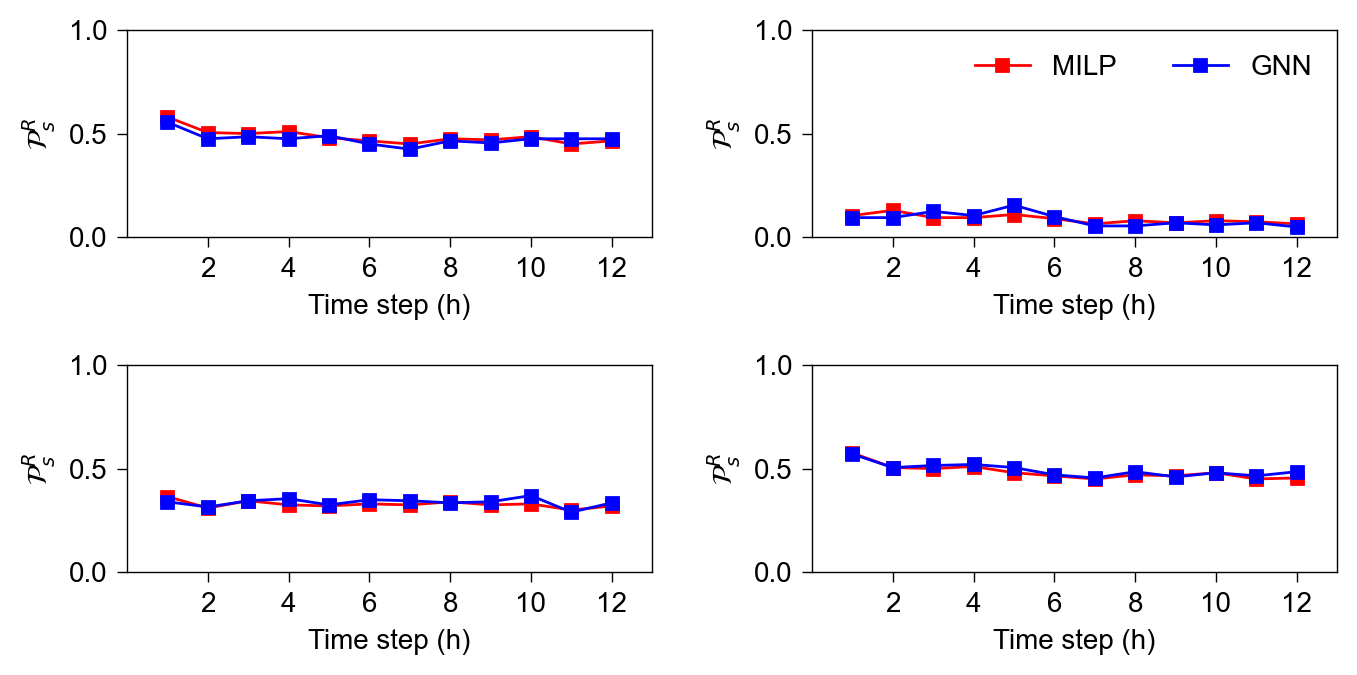

In [16]:
fig = plt.figure(figsize=(7, 3.5))

x = np.arange(1, 13)

ax = fig.add_subplot(221)
ax.plot(x, prob_true[0], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[0], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(222)
ax.plot(x, prob_true[1], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(223)
ax.plot(x, prob_true[2], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(224)
ax.plot(x, prob_true[3], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## 2. Shedding from non-reserve constraints

In [5]:
## Read shedding in test data
shedding_zero_reserve_true = []
shedding_zero_reserve_pred = []

test_size = 200

for i in range(test_size):
    # File path
    true_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding_zero_reserve/true/true_{i+1}.csv'
    pred_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding_zero_reserve/pred/pred_{i+1}.csv'

    # Read data
    try:
        temp1 = pd.read_csv(true_path, header=None, index_col=None)
        temp2 = pd.read_csv(pred_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    # Concatenate all data
    shedding_zero_reserve_true.append(temp1.values.copy())
    shedding_zero_reserve_pred.append(temp2.values.copy())

# Convert to numpy array and set precision
shedding_zero_reserve_true = np.abs(np.array(shedding_zero_reserve_true).astype(np.int32))
shedding_zero_reserve_pred = np.abs(np.array(shedding_zero_reserve_pred).astype(np.int32))

############################################################################
# Set prediction shreshold as 5 (prediction < 5 is considered as no shedding)
############################################################################
shedding_zero_reserve_pred[shedding_zero_reserve_pred < 5] = 0

In [9]:
# Calculate probability
prob_zero_reserve_true = np.mean((shedding_zero_reserve_true>0), axis=0)
prob_zero_reserve_pred = np.mean((shedding_zero_reserve_pred>0), axis=0)

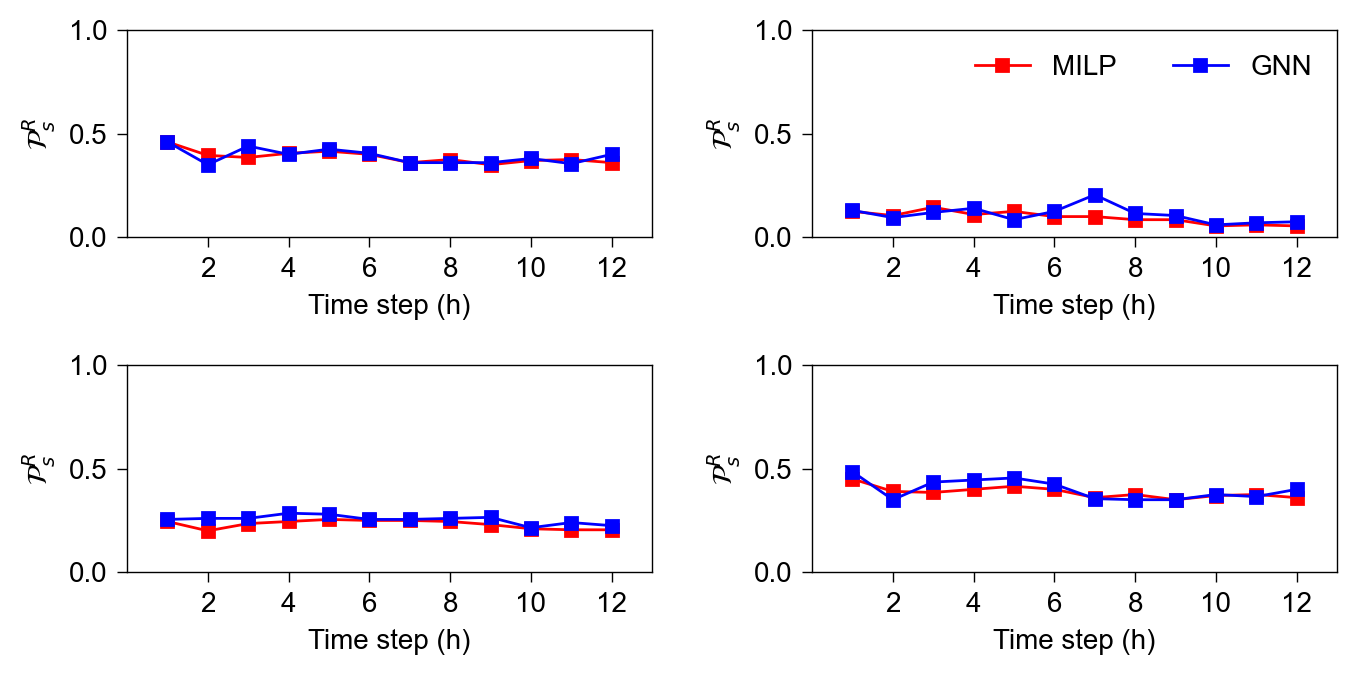

In [10]:
fig = plt.figure(figsize=(7, 3.5))

x = np.arange(1, 13)

ax = fig.add_subplot(221)
ax.plot(x, prob_zero_reserve_true[0], color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[0], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(222)
ax.plot(x, prob_zero_reserve_true[1], color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(223)
ax.plot(x, prob_zero_reserve_true[2], color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(224)
ax.plot(x, prob_zero_reserve_true[3], color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## 3. Shedding from reserve constraints

In [17]:
# Calculate probability
prob_reserve_true = prob_true - prob_zero_reserve_true
prob_reserve_pred = prob_pred - prob_zero_reserve_pred

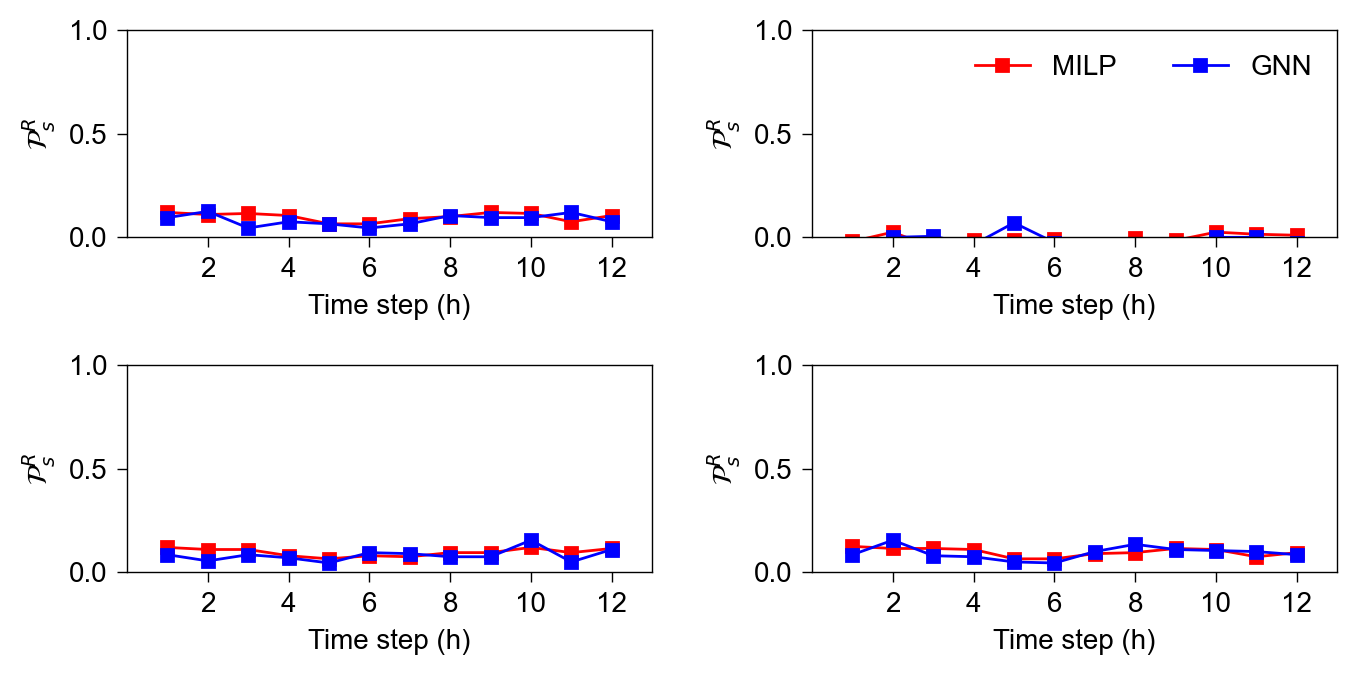

In [18]:
fig = plt.figure(figsize=(7, 3.5))

x = np.arange(1, 13)

ax = fig.add_subplot(221)
ax.plot(x, prob_reserve_true[0], color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[0], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(222)
ax.plot(x, prob_reserve_true[1], color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(223)
ax.plot(x, prob_reserve_true[2], color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(224)
ax.plot(x, prob_reserve_true[3], color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^R_s$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')